In [77]:
import vk_api
import networkx as nx
import time
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

In [4]:
# input your vk login and password
login = ''
password = ''
vk_session = vk_api.VkApi(login=login, password=password)  # no token is needed for subscriptions and friends
vk_session.auth()  # not needed if token is used
vk = vk_session.get_api()

In [8]:
sobchak_id = 453382669
friends = vk.friends.get(user_id=sobchak_id)['items']

In [19]:
# TAKES 4 MINUTES FOR SOBCHAK (245 friends)

for friend_id in friends:
    try:
        graph_data[friend_id] = vk.friends.get(user_id=friend_id)['items']
    except Exception as e:
        graph_data[friend_id] = list()
        print(e)  # prints error

    time.sleep(1)  # pauses are needed for vk api limitations, minimum is 0.35 seconds. Do not remove!

[30] This profile is private
[30] This profile is private
[18] User was deleted or banned
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[18] User was deleted or banned
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[30] This profile is private
[18] User was deleted or banned
[30] This profile is private
[18] User was deleted or banned
[18] User was deleted or banned
[18] User was deleted or banned


In [90]:
graph = nx.Graph(directed=True)
for sobchak_friend in graph_data:  # add sobchak friends
    graph.add_edge(sobchak_id, sobchak_friend)
    
    for nested_friend in graph_data[sobchak_friend]:  # add friends of friends
        graph.add_edge(sobchak_friend, nested_friend)

sobchak_ego_graph = nx.ego_graph(graph, sobchak_id, radius=1, undirected=False)

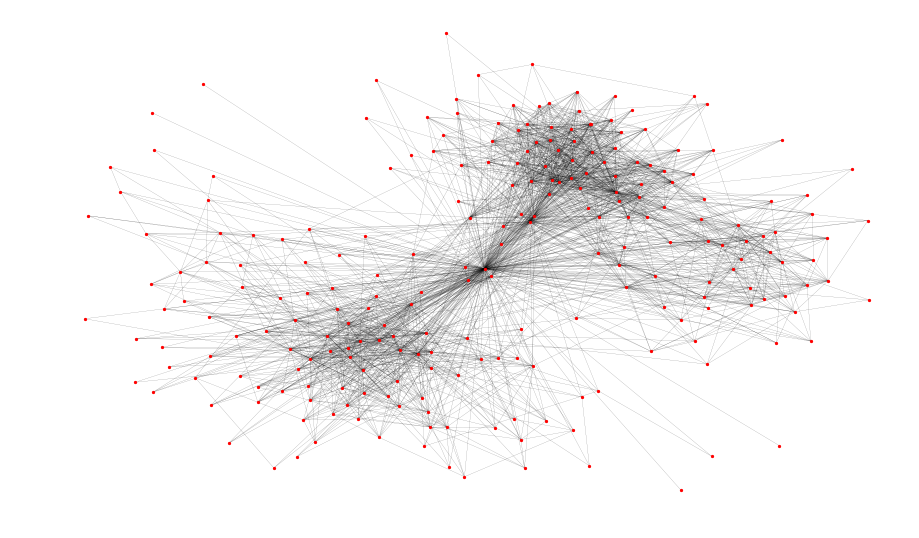

In [91]:
plt.figure(figsize=(12, 7))
nx.draw(sobchak_ego_graph, node_size=5, width=0.1)